### 15) 랜덤포레스트 모형(moons 데이터셋)

In [1]:
from sklearn.datasets import make_moons

#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# criterion(entropy,gini)
forest = RandomForestClassifier(n_estimators=6, random_state=2,criterion='entropy')
#                                   분류기수                        분류기준
forest.fit(X_train, y_train)

print("학습용:",forest.score(X_train, y_train))
print("검증용:",forest.score(X_test, y_test))

학습용: 0.96
검증용: 0.92


In [4]:
import numpy as np

idx=0
result=[]

for f in forest.estimators_:
#    print(idx)
#     print("학습용:",f.score(X_train, y_train))
#     print("검증용:",f.score(X_test, y_test))
    result.append(f.score(X_test, y_test))
    idx+=1    

print(result)
print(max(result))
print(np.argmax(result))    

[0.84, 0.88, 0.8, 0.92, 0.88, 0.8]
0.92
3


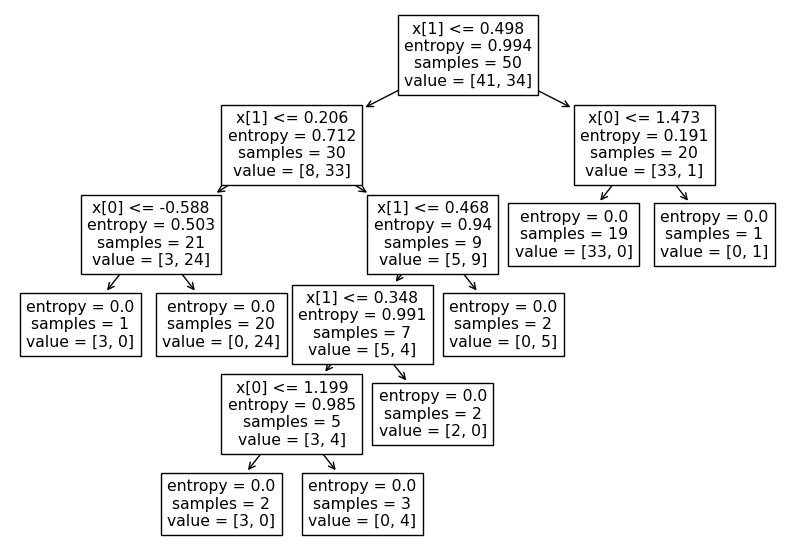

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10,7))
tree.plot_tree(forest.estimators_[3])
plt.show()

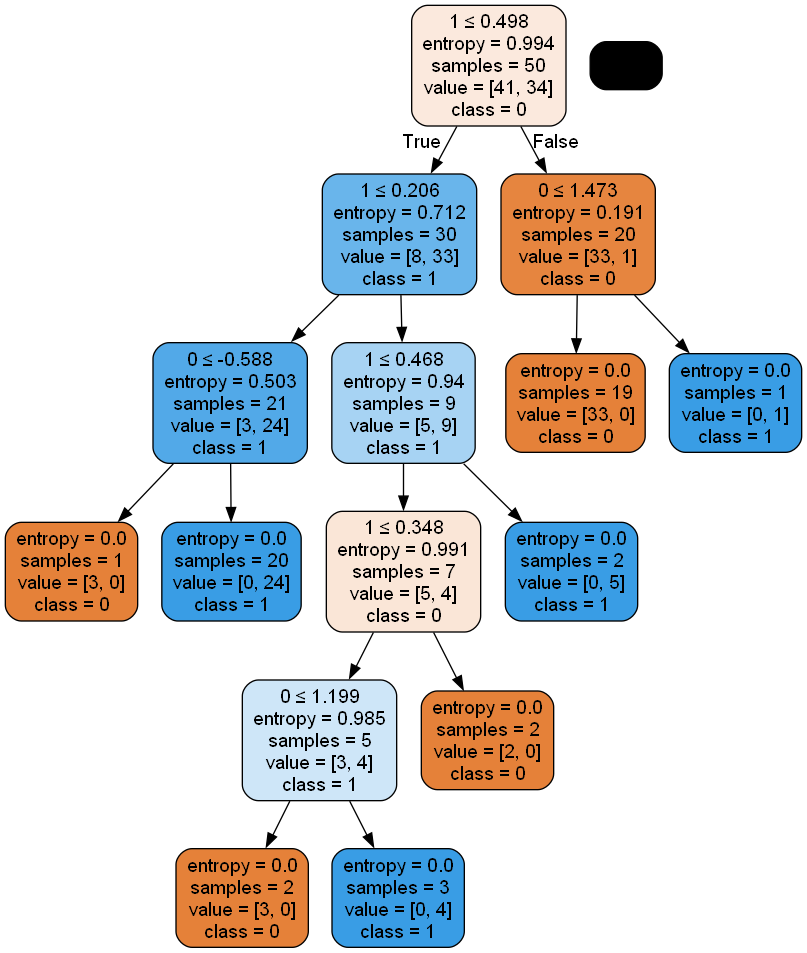

In [6]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(forest.estimators_[3], out_file=None, feature_names=[0,1],
                           class_names=['0','1'],
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [7]:
#0~11 값을 3행 4열의 2차원 배열로 변환

x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
np.ravel(x)  #다차원 배열을 1차원 배열로 변환

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0.5, 1.0, 'random forest')

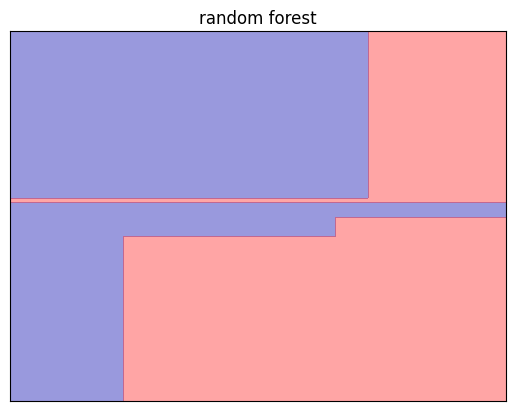

In [14]:
import mglearn

mglearn.plots.plot_2d_separator(forest.estimators_[3], X, fill=True, alpha=0.4)
plt.title("random forest")

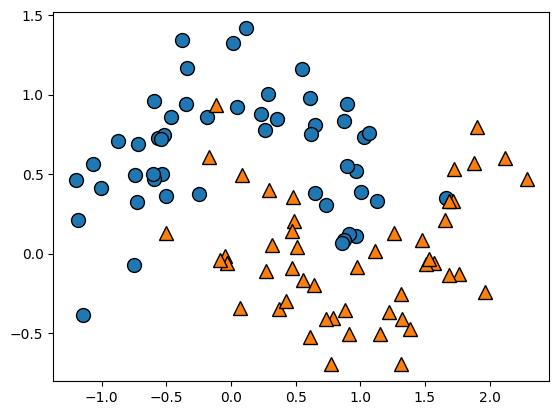

In [10]:
#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

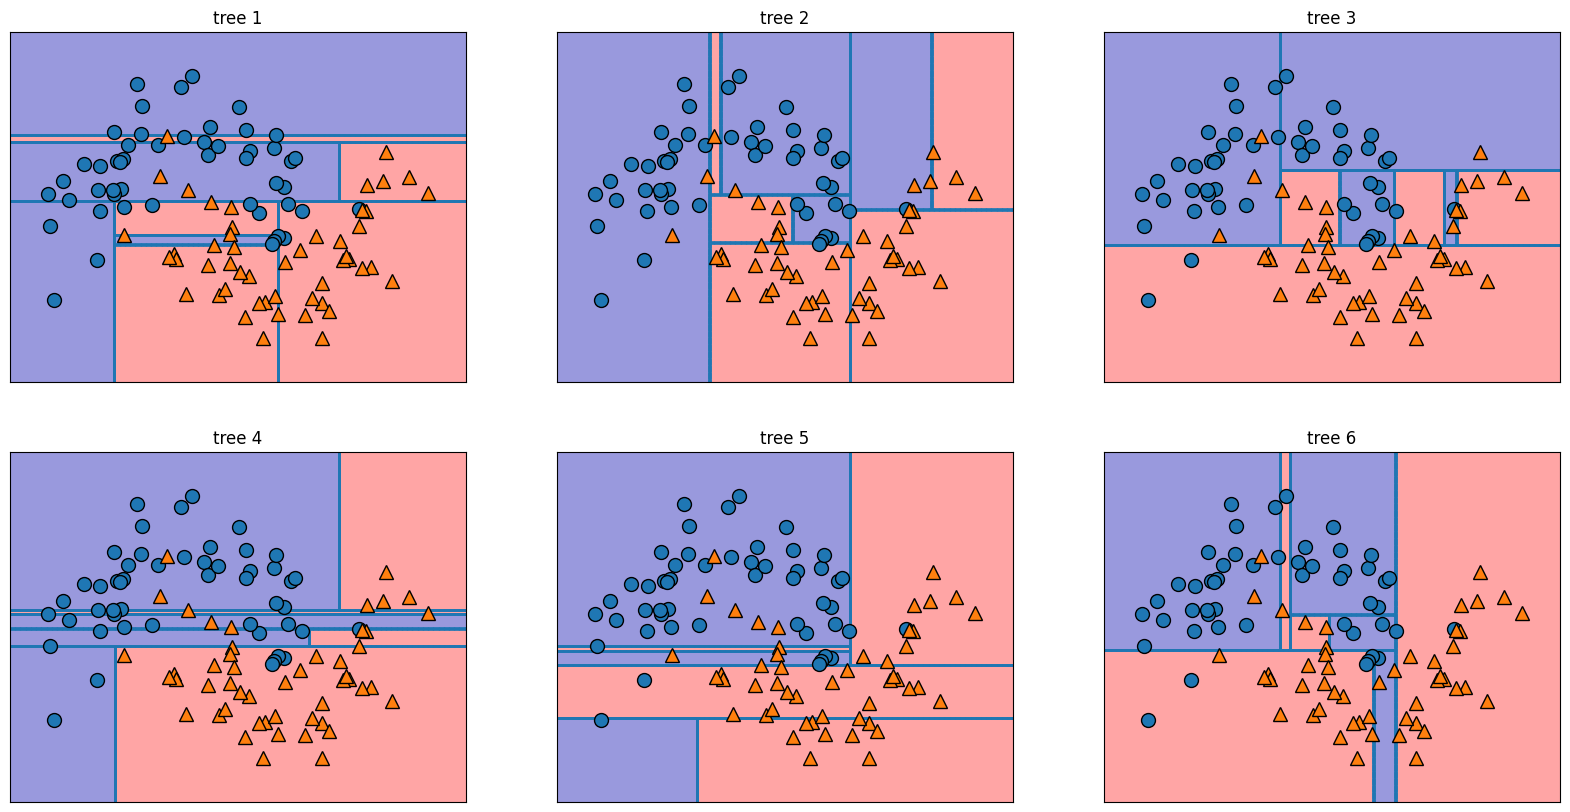

In [11]:
#2행 3열의 서브플롯

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
#print(axes.shape)

#ravel() : 2행 3열의 axes를 1차원으로 만들어서 트리 갯수와 매핑시킴
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'tree {i+1}')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)